<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Calories_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the csv file , understand contents
df_cal=pd.read_csv('/content/calories.csv')
df_exer=pd.read_csv('/content/exercise.csv')
df=pd.merge(df_cal,df_exer,on="User_ID")

df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
print('Data Set has rows {}, columns {}'.format( df.shape[0], df.shape[1]))
print('Data set has columns {}'.format(df.columns.values))


Data Set has rows 15000, columns 9
Data set has columns ['User_ID' 'Calories' 'Gender' 'Age' 'Height' 'Weight' 'Duration'
 'Heart_Rate' 'Body_Temp']


In [ ]:
df.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [ ]:
df.isna().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [ ]:
#Look for duplicates value
df.duplicated().sum()
#df[df.duplicated()==True]
#Remove
#df=df.drop_duplicates()


0

In [ ]:
#Look for unique values in each column
for col in df.columns:
  print('Column {} has {} unique values'.format(col,df[col].nunique()))

Column User_ID has 15000 unique values
Column Calories has 277 unique values
Column Gender has 2 unique values
Column Age has 60 unique values
Column Height has 90 unique values
Column Weight has 91 unique values
Column Duration has 30 unique values
Column Heart_Rate has 59 unique values
Column Body_Temp has 45 unique values


In [ ]:
df=df.drop(['User_ID'], axis=1)

KeyError: "['User_ID'] not found in axis"

<Axes: xlabel='Body_Temp', ylabel='Calories'>

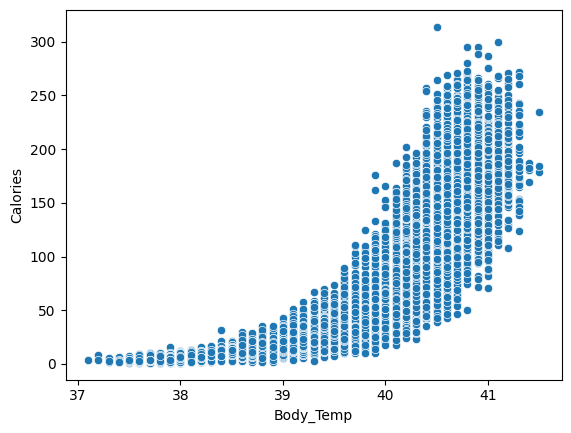

In [ ]:
sns.scatterplot(data=df, x='Body_Temp', y='Calories')


<Axes: xlabel='Heart_Rate', ylabel='Calories'>

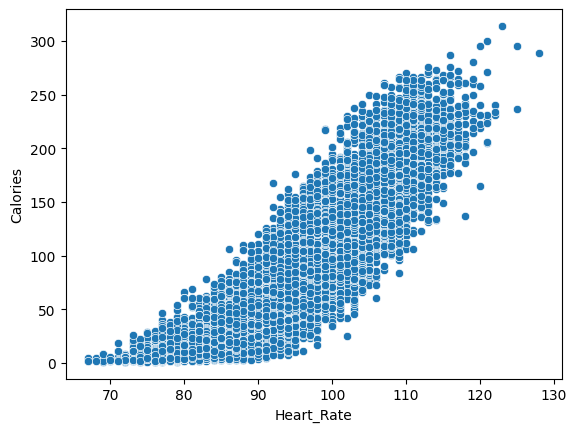

In [ ]:
sns.scatterplot(data=df, x='Heart_Rate', y='Calories')

<Axes: xlabel='Duration', ylabel='Calories'>

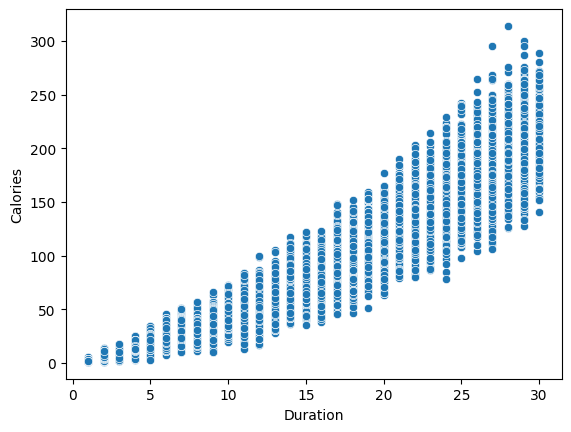

In [ ]:
sns.scatterplot(data=df, x='Duration', y='Calories')

In [ ]:
#Look for unique values in each column
for col in df.columns:
  print('Column {} has {} unique values'.format(col,df[col].nunique()))

Column Transaction date has 414 unique values
Column House age has 178 unique values
Column Distance to the nearest MRT station has 183 unique values
Column Number of convenience stores has 11 unique values
Column Latitude has 414 unique values
Column Longitude has 414 unique values
Column House price of unit area has 384 unique values


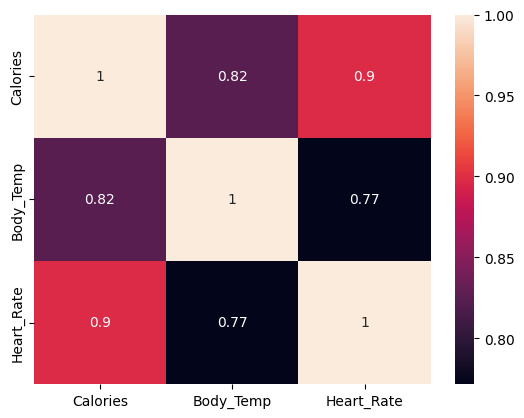

In [ ]:
corr = df[['Calories','Body_Temp','Heart_Rate']].corr()
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
Y=np.array(df['Calories']).reshape(-1,1)
X=np.array(df['Heart_Rate']).reshape(-1,1)

In [ ]:
RESIDUAL=  Y - Y_predicated
SS_res=sum(np.square(RESIDUAL))
SS_total = sum(np.square(Y-np.mean(X)))
R2= 1 - (SS_res/ SS_total)
print(R2)
#print(SS_total)
#print([a * a for a in RESIDUAL])
#SS_res1=(2-2.8)**2 +(4-3.4)**2 + (5-4)**2 + (4-4.6)**2 + (5-5.2)**2
#SS_total1=(2-3)**2 +(4-3)**2 + (5-3)**2 + (4-3)**2 + (5-3)**2
#R2 =1 -( SS_res1/ SS_total1)
#print(R2)

[0.99986272]


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [ ]:
model.coef_

array([[5.85172489]])

In [ ]:
model.intercept_

array([-469.40864534])

In [ ]:
Y_LR_pred=model.predict(X)

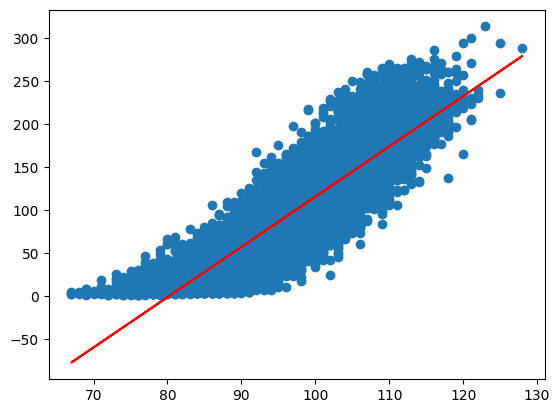

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_LR_pred, color='r')

In [ ]:
from sklearn.metrics import r2_score
model.score(X,Y)


0.8061921948170285

In [ ]:
r2_score(Y, Y_LR_pred)

0.8061921948170285